# To Study Customer churn Prediction In Telecom Industry



# Dataset
The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

# Objectives
 To predict Customer churn.

 Highlighting the main variables/ factors
 influencing customer churn.

 Use various ML algorithms to build prediction
  models, evaluate the accuracy and performance of these models.

 Finding out the best model for our business.


# Summary

This project aims to analyze and predict customer churn in a telecommunications company using the
Telco Customer Churn dataset available on Kaggle.
Customer churn is a critical metric for businesses, and understanding the factors influencing
it can help in implementing targeted strategies to retain customers.


# Import libraries

In [8]:
import pandas as pd
import numpy as np


In [2]:
#This function is used to read data from a CSV file into a Pandas DataFrame.

In [9]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [10]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
#The column labeled 'customerID' is the one being dropped.

In [11]:
df.drop('customerID',axis=1,inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [12]:
#  The info() method, in particular, provides information about
the DataFrame, including data types, non-null counts, and memory usage.

In [13]:
df.info

<bound method DataFrame.info of       gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL       

In [ ]:
#The df.shape code is used to determine the dimensions of
the Pandas DataFrame 'df'. Specifically, it returns a tuple 
representing the number of rows and columns in the DataFrame. 
The format is (number_of_rows, number_of_columns).

In [14]:
df.shape

(7043, 20)

In [ ]:
#This code can be helpful for data cleaning and preprocessing,
allowing you to identify columns with missing data and decideon strategies 
to handle those missing values, such as imputation or removal.

In [15]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [17]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [18]:
df.iloc[488].TotalCharges

' '

In [19]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [20]:
#Remove rows with space in TotalCharges

df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [21]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [22]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\Yash\AppData\Local\Temp\ipykernel_1044\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [23]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [24]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [ ]:
# The df1.dtypes code is used to display the data types of each column in the Pandas DataFrame 'df1'. 
It returns a Pandas Series with the column names as indices and the corresponding data types 
as values.

In [25]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [26]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 
                

In [ ]:
#This function iterates through each column of the DataFrame and prints the unique values present in that column. 
It uses the unique() method of Pandas Series to obtain unique values.

In [27]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [28]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\Yash\AppData\Local\Temp\ipykernel_1044\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\Yash\AppData\Local\Temp\ipykernel_1044\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [29]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [30]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\Yash\AppData\Local\Temp\ipykernel_1044\1648037665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [31]:
for col in df1:
    print(f'{col}: {df[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

In [33]:
#replace values in the 'gender' column of the Pandas DataFrame
'df1'. It replaces 'Female' with 1 and 'Male' with 0,
and the modification is done in-place.

In [34]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\Yash\AppData\Local\Temp\ipykernel_1044\698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [35]:
df1.gender.unique()

array([1, 0], dtype=int64)

In [36]:
#One hot encoding for categorical columns

df2= pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [37]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5377,0,0,0,0,4,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1999,0,0,0,0,23,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1724,1,0,1,0,3,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5647,1,0,1,0,46,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
549,0,0,0,0,15,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [38]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [ ]:
# It scales the columns 'tenure', 'MonthlyCharges', and 
'TotalCharges' to a range between 0 and 1

In [39]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [41]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [42]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [ ]:
# data visualisation

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Yash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

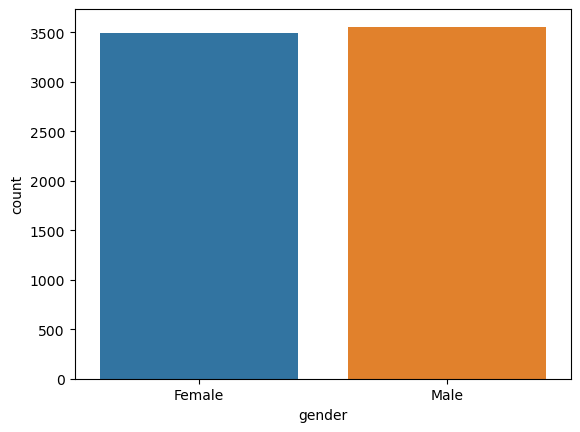

In [44]:
sns.countplot(df['gender'])

In [46]:
df["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

C:\Users\Yash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

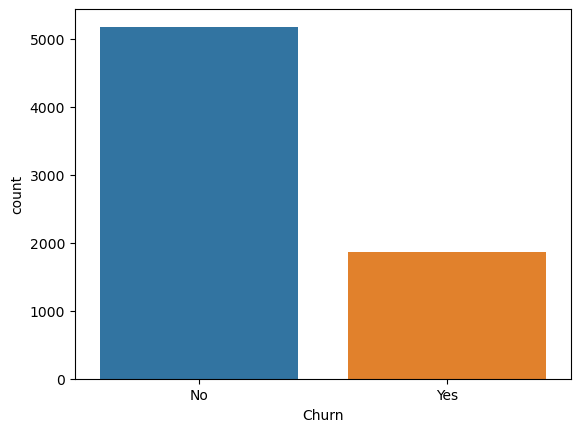

In [47]:
sns.countplot(df['Churn'])

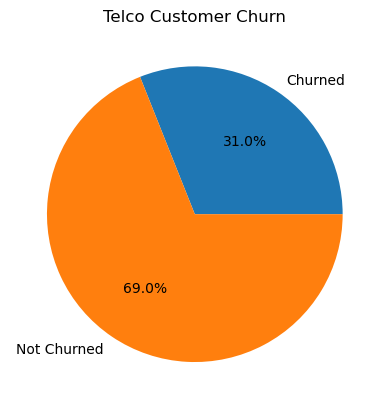

In [48]:
# Number of churned and non-churned customers
churned = 2186
not_churned = 4857

# Create a pie chart
plt.pie([churned, not_churned], labels=['Churned', 'Not Churned'], autopct='%1.1f%%')

# Add title
plt.title('Telco Customer Churn')

# Display the chart
plt.show()


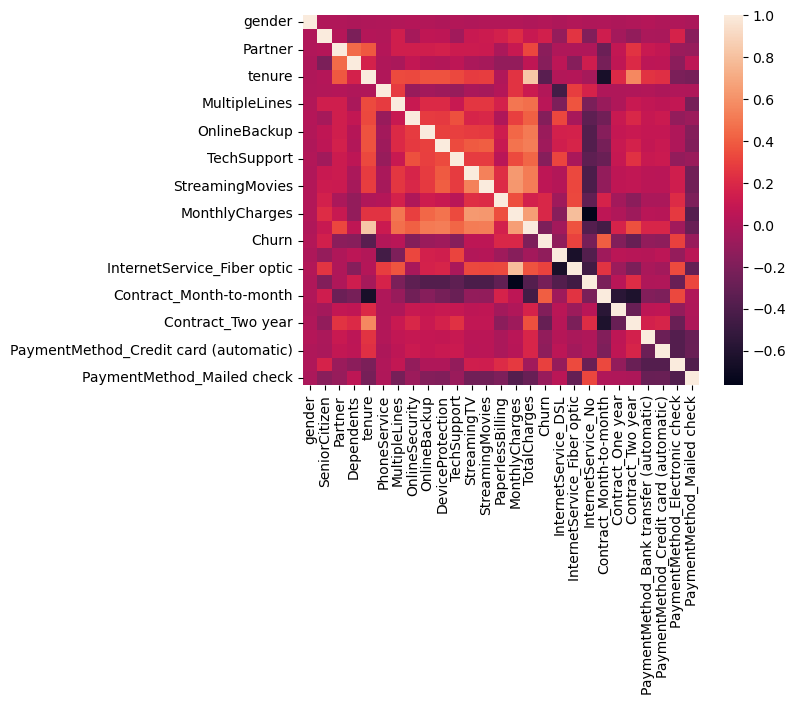

In [49]:
sns.heatmap(df2.corr())
plt.show()


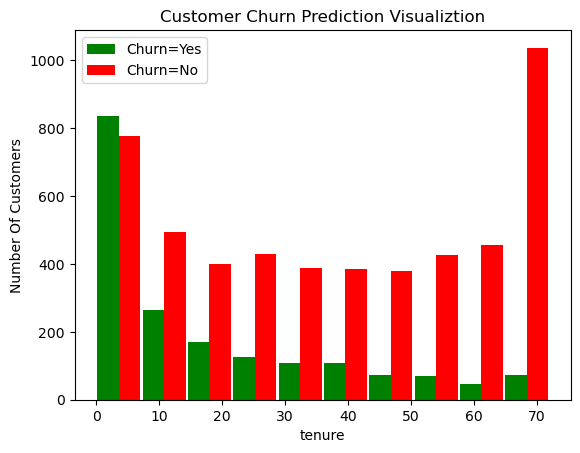

In [50]:
#Data Visualization 

tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

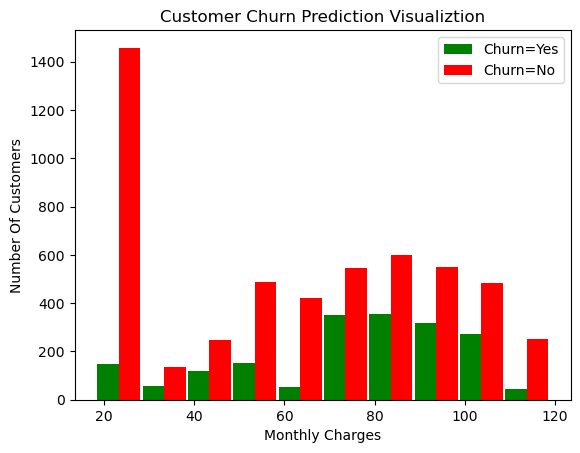

In [51]:
mc_churn_no = df[df.Churn=='No'].MonthlyCharges      
mc_churn_yes = df[df.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

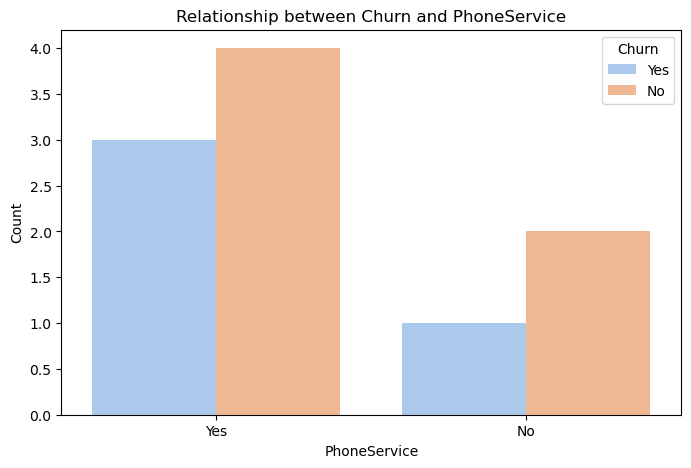

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming you've downloaded the dataset and loaded it into a DataFrame:
# For demonstration purposes, I'll create a simple DataFrame with relevant columns
data = {'Churn': ['Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No'],
        'PhoneService': ['Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes']}
df = pd.DataFrame(data)

# Plot the relationship between Churn and PhoneService
plt.figure(figsize=(8, 5))
sns.countplot(x='PhoneService', hue='Churn', data=df, palette='pastel')
plt.title('Relationship between Churn and PhoneService')
plt.xlabel('PhoneService')
plt.ylabel('Count')
plt.show()

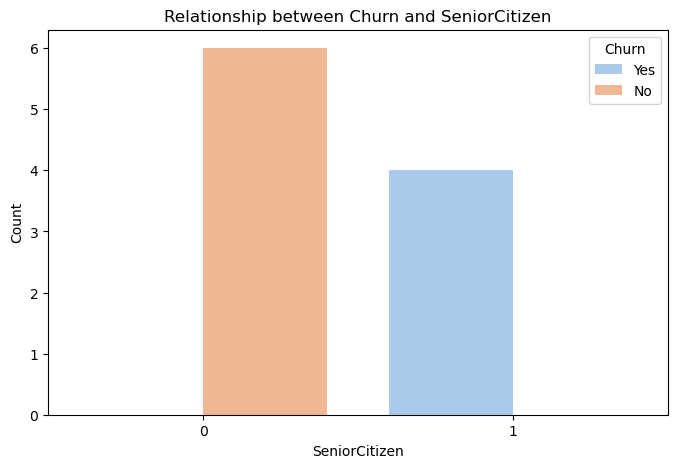

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming you've downloaded the dataset and loaded it into a DataFrame:
# For demonstration purposes, I'll create a simple DataFrame with relevant columns
data = {'Churn': ['Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No'],
        'SeniorCitizen': [1, 0, 0, 1, 1, 0, 0, 1, 0, 0]}
df = pd.DataFrame(data)

# Plot the relationship between Churn and SeniorCitizen
plt.figure(figsize=(8, 5))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette='pastel')
plt.title('Relationship between Churn and SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Count')
plt.show()

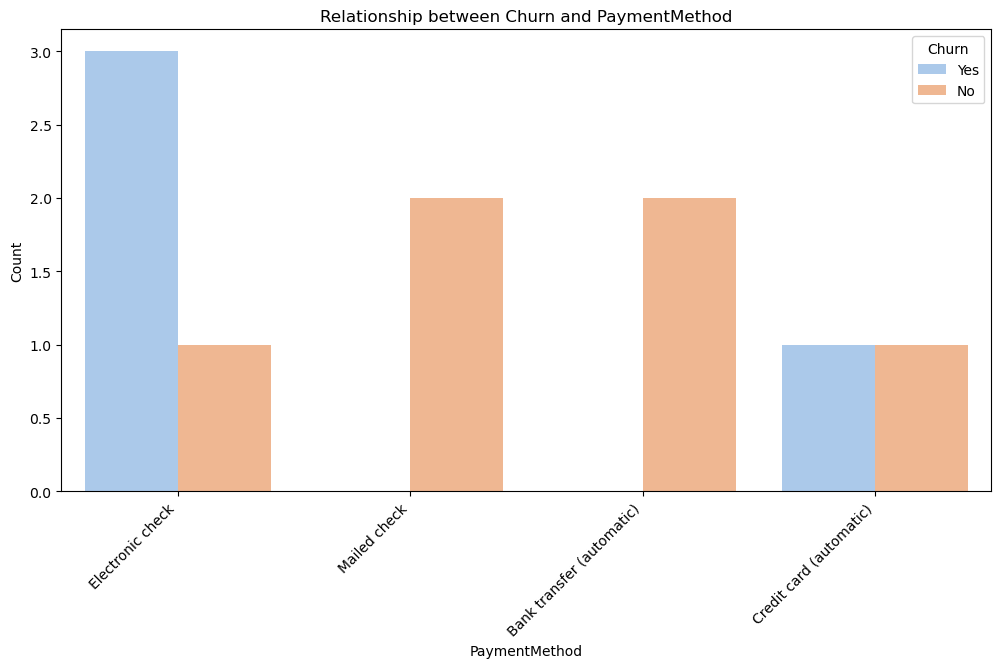

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming you've downloaded the dataset and loaded it into a DataFrame:
# For demonstration purposes, I'll create a simple DataFrame with relevant columns
data = {'Churn': ['Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No'],
        'PaymentMethod': ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Electronic check', 'Credit card (automatic)', 'Mailed check', 'Bank transfer (automatic)', 'Electronic check', 'Credit card (automatic)', 'Electronic check']}
df = pd.DataFrame(data)

# Plot the relationship between Churn and PaymentMethod
plt.figure(figsize=(12, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='pastel', order=df['PaymentMethod'].value_counts().index)
plt.title('Relationship between Churn and PaymentMethod')
plt.xlabel('PaymentMethod')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

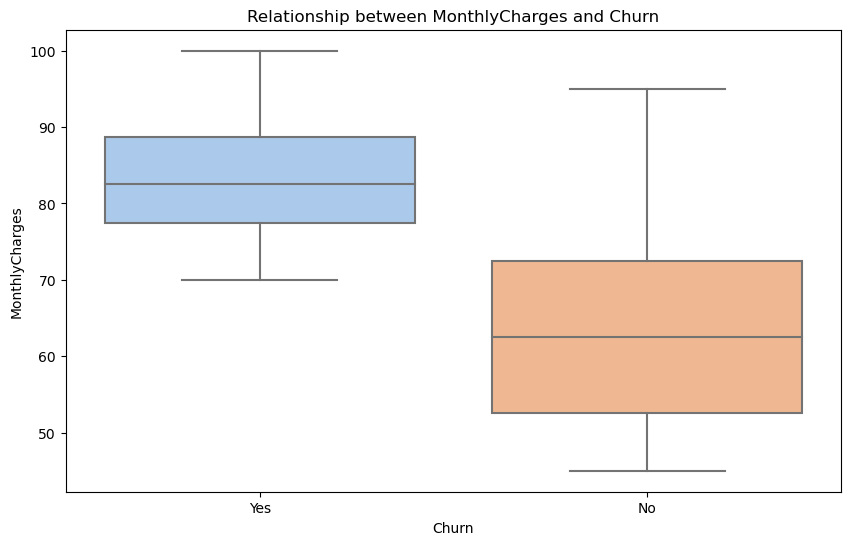

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming you've downloaded the dataset and loaded it into a DataFrame:
# For demonstration purposes, I'll create a simple DataFrame with relevant columns
data = {'Churn': ['Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No'],
        'MonthlyCharges': [70.0, 50.0, 60.0, 80.0, 100.0, 45.0, 75.0, 85.0, 65.0, 95.0]}
df = pd.DataFrame(data)

# Plot the relationship between MonthlyCharges and Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='pastel')
plt.title('Relationship between MonthlyCharges and Churn')
plt.xlabel('Churn')
plt.ylabel('MonthlyCharges')
plt.show()

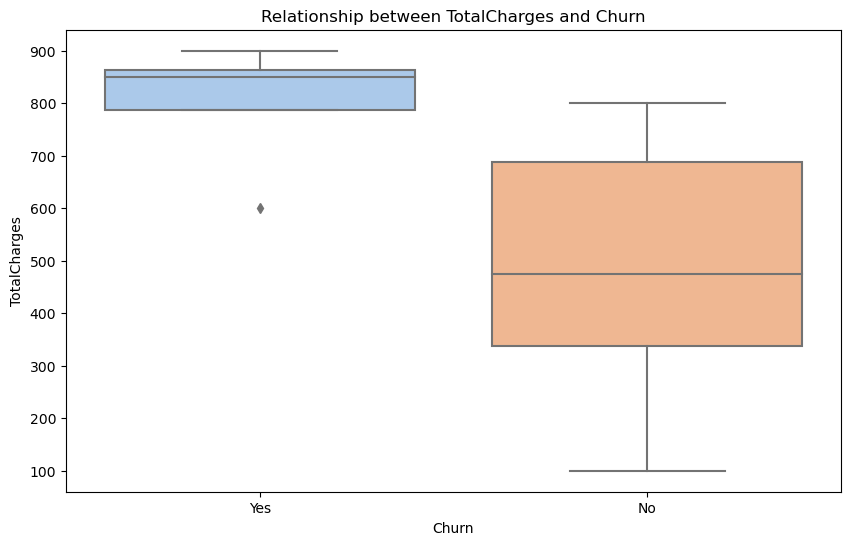

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming you've downloaded the dataset and loaded it into a DataFrame:
# For demonstration purposes, I'll create a simple DataFrame with relevant columns
data = {'Churn': ['Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No'],
        'TotalCharges': [850.0, 100.0, 450.0, 600.0, 850.0, 300.0, 750.0, 900.0, 500.0, 800.0]}
df = pd.DataFrame(data)

# Convert TotalCharges to numeric (if not already)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Plot the relationship between TotalCharges and Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='pastel')
plt.title('Relationship between TotalCharges and Churn')
plt.xlabel('Churn')
plt.ylabel('TotalCharges')
plt.show()

In [57]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [58]:
# outlier detection

In [59]:
import pandas as pd
import numpy as np
from scipy import stats
# Select numeric columns for outlier detection
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate Z-scores for each numeric column
z_scores = np.abs(stats.zscore(df[numeric_columns]))

# Set a threshold for Z-scores (you can adjust this threshold based on your requirements)
threshold = 3

# Identify outliers
outliers = np.where(z_scores > threshold)

# Display the rows and columns of outliers
outlier_rows, outlier_columns = np.unique(outliers[0]), np.unique(outliers[1])

print("Rows with outliers:")
print(df.iloc[outlier_rows])

if len(outlier_rows) > 0:
    print("Rows with outliers:")
    print(telco_data.iloc[outlier_rows])
else:
    print("No outliers found in the dataset.")

Rows with outliers:
Empty DataFrame
Columns: [Churn, TotalCharges]
Index: []
No outliers found in the dataset.


# boxplot

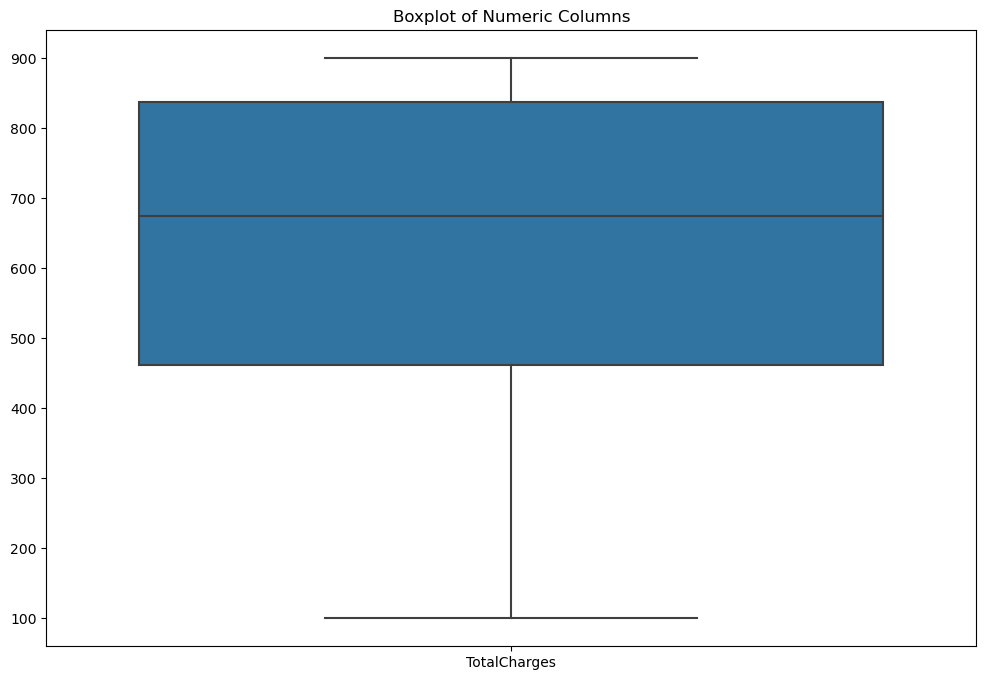

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Select numeric columns for boxplot
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Create boxplots for each numeric column
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_columns])
plt.title("Boxplot of Numeric Columns")
plt.show()

In [61]:
pip install pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


# standardization

In [62]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Assuming your features are in X (you might need to adjust this based on your actual column names)
features = df2.drop('Churn', axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
features_standardized = scaler.fit_transform(features)

# Replace the original features with the standardized features
df2[features.columns] = features_standardized

# Now, 'data' contains the standardized features

In [63]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.009430,-0.440327,1.035617,-0.652305,-1.280248,-3.056334,-0.854336,-0.633746,1.378330,-0.723918,...,1.382243,-0.886896,-0.52513,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,1.404764,-0.543604
1,-0.990658,-0.440327,-0.965608,-0.652305,0.064303,0.327189,-0.854336,1.577918,-0.725516,1.381372,...,1.382243,-0.886896,-0.52513,-1.107895,1.943495,-0.561364,-0.529976,-0.525351,-0.711863,1.839576
2,-0.990658,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.854336,1.577918,1.378330,-0.723918,...,1.382243,-0.886896,-0.52513,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,-0.711863,1.839576
3,-0.990658,-0.440327,-0.965608,-0.652305,0.512486,-3.056334,-0.854336,1.577918,-0.725516,1.381372,...,1.382243,-0.886896,-0.52513,-1.107895,1.943495,-0.561364,1.886879,-0.525351,-0.711863,-0.543604
4,1.009430,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.854336,-0.633746,-0.725516,-0.723918,...,-0.723462,1.127527,-0.52513,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,1.404764,-0.543604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.990658,-0.440327,1.035617,1.533025,-0.343137,0.327189,1.170500,1.577918,-0.725516,1.381372,...,1.382243,-0.886896,-0.52513,-1.107895,1.943495,-0.561364,-0.529976,-0.525351,-0.711863,1.839576
7039,1.009430,-0.440327,1.035617,1.533025,1.612573,0.327189,1.170500,-0.633746,1.378330,1.381372,...,-0.723462,1.127527,-0.52513,-1.107895,1.943495,-0.561364,-0.529976,1.903490,-0.711863,-0.543604
7040,1.009430,-0.440327,1.035617,1.533025,-0.872808,-3.056334,-0.854336,1.577918,-0.725516,-0.723918,...,1.382243,-0.886896,-0.52513,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,1.404764,-0.543604
7041,-0.990658,2.271039,1.035617,-0.652305,-1.158016,0.327189,1.170500,-0.633746,-0.725516,-0.723918,...,-0.723462,1.127527,-0.52513,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,-0.711863,1.839576


# Apply oversampling Method

In [64]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder




# Preprocess the data
le = LabelEncoder()
df2['Churn'] = le.fit_transform(df2['Churn'])

# Separate features and target variable
X = df2.drop('Churn', axis=1)
y = df2['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check if n_neighbors is less than or equal to the number of samples
n_neighbors = 1
if n_neighbors > len(X_train):
    n_neighbors = len(X_train) - 1

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42, k_neighbors=n_neighbors)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Now, X_resampled and y_resampled contain the oversampled data

# Check the distribution of classes after oversampling
print("Class distribution after oversampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after oversampling:
1    4130
0    4130
Name: Churn, dtype: int64


# train_test_split

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Assuming your target variable is 'Churn' and you want to predict it based on other features
X = df2.drop('Churn', axis=1)
y = df2['Churn']

# Convert categorical variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# Model Fitting

# Decision Tree Classifier

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Assuming your target variable is 'Churn' and you want to predict it based on other features
X = df2.drop('Churn', axis=1)
y = df2['Churn']

# Convert categorical variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.72

Confusion Matrix:
[[821 212]
 [182 192]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1033
           1       0.48      0.51      0.49       374

    accuracy                           0.72      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.72      0.72      1407



# Random Forest Classifier

In [67]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Separate features and target variable
X = df2.drop('Churn', axis=1)
y = df2['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.7825159914712153

Confusion Matrix:
 [[926 107]
 [199 175]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.62      0.47      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



# Logistic Regression

In [68]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Separate features and target variable
X = df2.drop('Churn', axis=1)
y = df2['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.7882018479033405

Confusion Matrix:
 [[916 117]
 [181 193]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



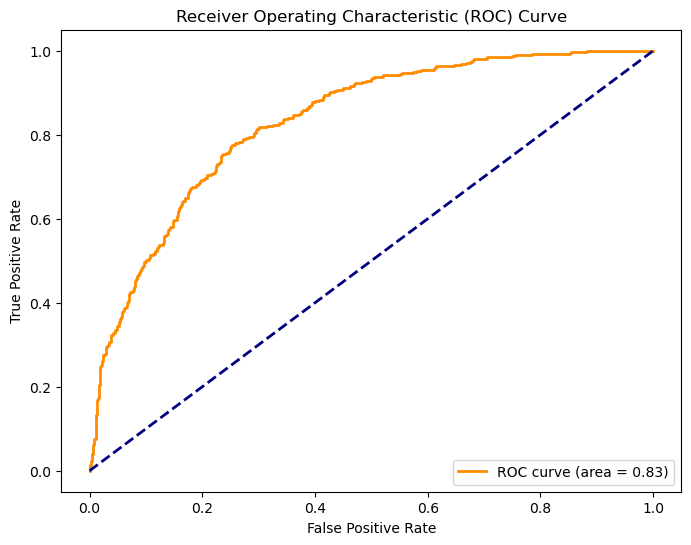

In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_probabilities = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# xgboost

In [70]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


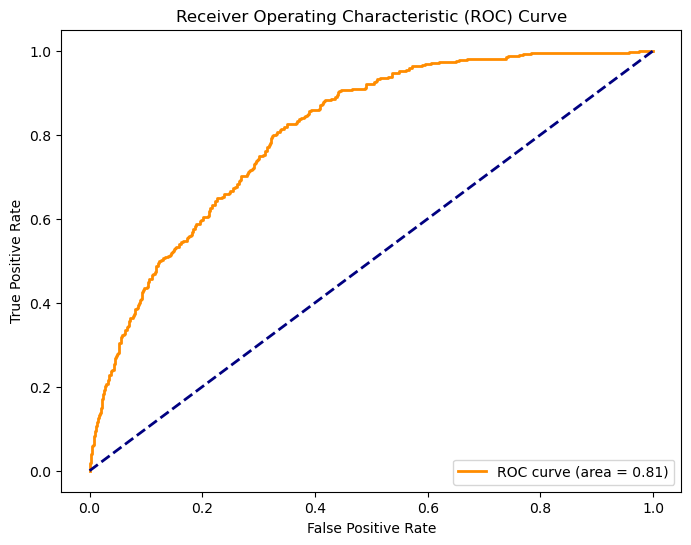

In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
model = XGBClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_probabilities = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# SVM

In [72]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


# Separate features and target variable
X = df2.drop('Churn', axis=1)
y = df2['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the model
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.7953091684434968

Confusion Matrix:
 [[918 115]
 [173 201]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.54      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



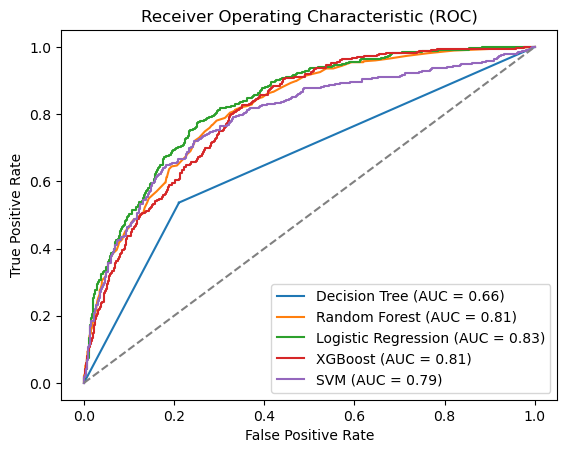

ROC AUC Scores:
Decision Tree: 0.66
Random Forest: 0.81
Logistic Regression: 0.83
XGBoost: 0.81
SVM: 0.79


In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Preprocessing
df2['TotalCharges'] = pd.to_numeric(df2['TotalCharges'], errors='coerce')
df2.dropna(inplace=True)

# Convert categorical variables to numerical
df2 = pd.get_dummies(df2, drop_first=True)

# Define features and target variable
X = df2.drop(columns=['Churn'])
y = df2['Churn']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": XGBClassifier(),
    "SVM": SVC(probability=True)
}

roc_auc_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    roc_auc_scores[name] = roc_auc
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC scores
print("ROC AUC Scores:")
for name, score in roc_auc_scores.items():
    print(f"{name}: {score:.2f}")

#Conclusion: From above ROC AUC Scores Logistic regression with 0.83 AUC value 
which is conclude that Logistic Regression is best fitted model.